# Heart Disease

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

**Univariate Analysis**

<Axes: xlabel='Age', ylabel='Count'>

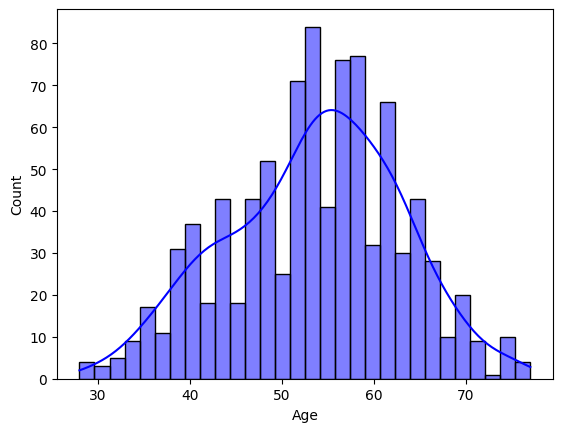

In [13]:
sns.histplot(df['Age'], kde = True, bins = 30, color = 'blue')

Max people are in the age group of 50-60

<Axes: xlabel='HeartDisease', ylabel='count'>

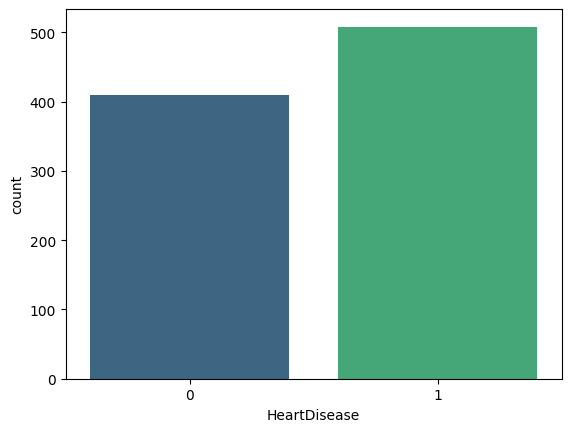

In [9]:
sns.countplot(x = 'HeartDisease', data = df, palette = 'viridis')

 Inference - 500 people have heartdisease

<Axes: ylabel='count'>

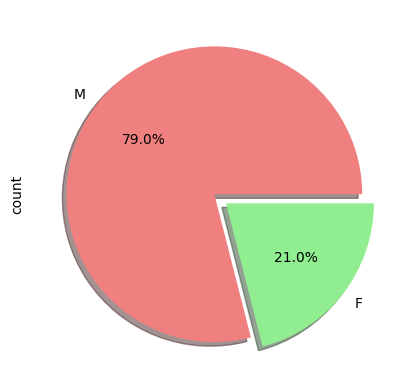

In [21]:
df.Sex.value_counts().plot.pie(autopct = '%1.1f%%', colors = ['lightcoral', 'lightgreen'], explode = [0, 0.1], shadow = True)

<Axes: xlabel='Cholesterol', ylabel='Count'>

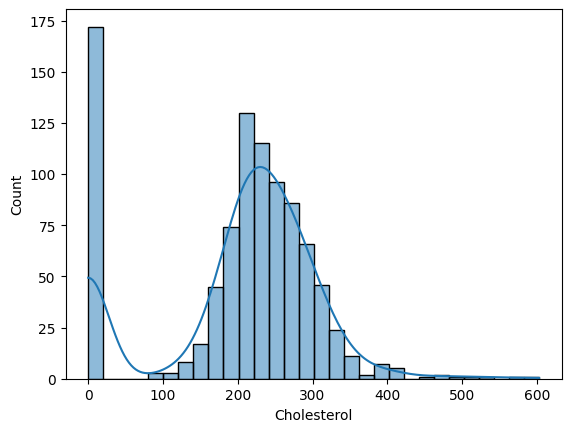

In [51]:
sns.histplot(x = 'Cholesterol', data = df, kde = True, bins = 30)

**Bivariate Analysis**

<Axes: xlabel='Cholesterol', ylabel='HeartDisease'>

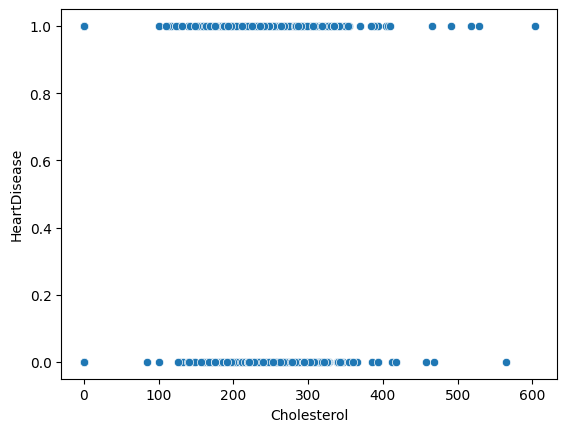

In [23]:
sns.scatterplot(x ='Cholesterol', y = 'HeartDisease', data = df)

<Axes: xlabel='Age', ylabel='HeartDisease'>

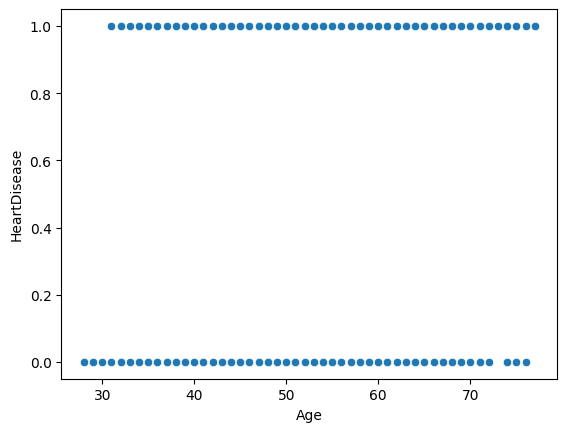

In [29]:
sns.scatterplot(x = 'Age', y = 'HeartDisease', data = df)

<Axes: xlabel='Sex', ylabel='HeartDisease'>

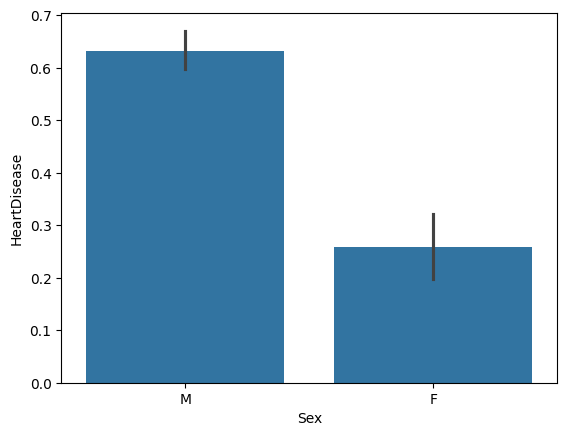

In [33]:
sns.barplot(x = 'Sex', y = 'HeartDisease', data = df)

<Figure size 3000x1000 with 0 Axes>

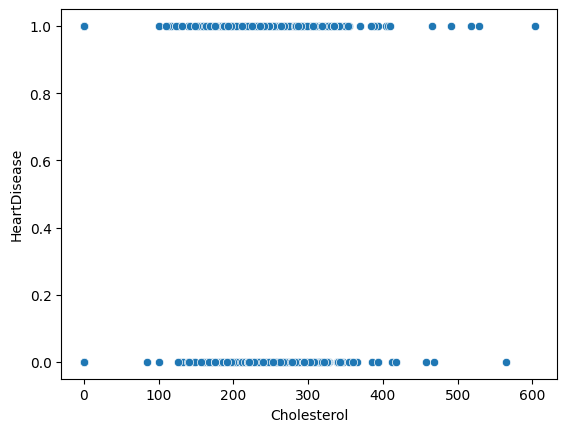

<Figure size 3000x1000 with 0 Axes>

In [54]:
sns.scatterplot(x = 'Cholesterol', y = 'HeartDisease', data = df)
plt.figure(figsize = (30,10))

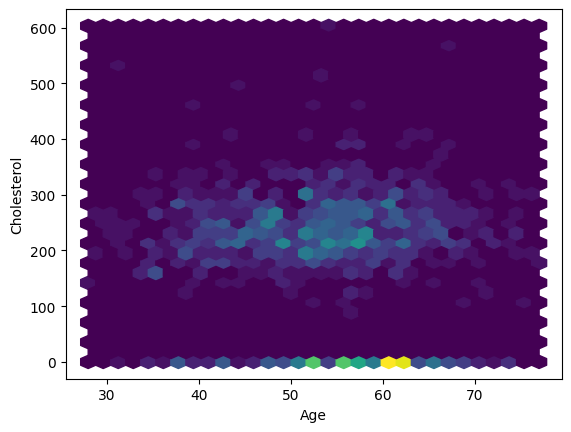

In [49]:
plt.hexbin(df['Age'], df['Cholesterol'], gridsize=30)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()


In [57]:
from scipy.stats import f_oneway

groups = []
for g in df['Age'].unique():
    groups.append(df[df['Age'] == g]['Cholesterol'])

f_stat, p_value = f_oneway(*groups)
print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 1.2877016539017987
p-value: 0.0926008821106772


p > 0.05 = All groups have similar cholesterol levels

In [58]:
from scipy.stats import f_oneway

chol_0 = df[df['HeartDisease'] == 0]['Cholesterol']
chol_1 = df[df['HeartDisease'] == 1]['Cholesterol']

f_stat, p_value = f_oneway(chol_0, chol_1)

print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 52.45972492169852
p-value: 9.308308883529952e-13


In [59]:
from scipy.stats import ttest_ind

t_stat, p = ttest_ind(chol_0, chol_1)
print(t_stat, p)


7.242908595426182 9.308308883532983e-13
